<a href="https://colab.research.google.com/github/sparta-13/SUPERVISED-ML-CLASSIFICATION-PROJECT/blob/main/Cardiovascular_Risk_Prediction_Rishikesh_Damale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Risk Prediction**
***
Before going deep into the project, Lets understand what are Cardiovascular diseases and some of their major causes.

**Cardiovascular diseases**, also called CVDs, are the leading cause of death globally, **causing an estimated 17.9 million deaths each year**. 

**CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions**. More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are **unhealthy diet, physical inactivity, tobacco use** and **harmful use of alcohol**. 

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths.

If you want to know more, Plz visit : https://www.who.int/health-topics/cardiovascular-diseases#tab=tab_1



# **Problem Statement and Objective :**

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information.
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Description :**
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

This dataset has the following 17 variables as explanatory variables:

**Demographic:**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)

**Behavioral**

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical( history)**

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke 
(Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

**Medical(current)**

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

**Predict variable (desired target)**

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

# **Importing necessary libraries**

In [1]:
# Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing data manipulation libraries.
import pandas as pd
import numpy as np

# Importing warnings library. The warnings module handles warnings in Python. 
# Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

# Importing data preprocessing libraries. 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Importing model selection libraries.
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing Support vector machine Classifier.
from sklearn import svm

# Importing XGB Classifier.
from xgboost import XGBClassifier

# Importing Tensorflow for neural networks.
from tensorflow import keras
import tensorflow as tf

# Importing Sklearn metrics for model evaluation.
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score,f1_score,plot_confusion_matrix

# Importing SMOTE and Tomek for handling class imbalancies.
from imblearn.combine import SMOTETomek      #we tried using this method as well....
from imblearn.over_sampling import SMOTE

# Importing Counter.
from collections import Counter

# **Loading the dataset and Exploring it...**

We will load the dataset from the drive and understand it. What features do we have and how are we going to process them etc..

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Cardiovascular risk Data File.
Cardio_df = pd.read_csv('/content/drive/MyDrive/SUPERVISED ML - Classification/data_cardiovascular_risk.csv')

# Observing the dataset
Cardio_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


Now lets see few records...

In [4]:
# First 5 rows from the dataset..
Cardio_df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
# Last 5 rows from the dataset..
Cardio_df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
# Shape of the dataset
Cardio_df.shape

(3390, 17)

We have 3390 rows and 17 columns in the dataset..

In [7]:
# Observe columns from the dataset
Cardio_df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

This is the list of columns that we have ...we discussed them above in data description.

In [8]:
# Description of all columns in the dataset.
Cardio_df.describe(include = 'all').T   # T will give transpose of the output..and we are including all columns...

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3303.0,NaN,NaN,NaN,1.970936,1.019081,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3368.0,NaN,NaN,NaN,9.069477,11.879078,0.0,0.0,0.0,20.0,70.0
BPMeds,3346.0,NaN,NaN,NaN,0.029886,0.170299,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [9]:
# .info gives the information about the dataset , columns their data type and  null count etc..
Cardio_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

We can see their are null values present in totChol,  BMI, glucose , BPMeds ,cigsPerDay,   education has some null values and  heartRate has 1 null value..

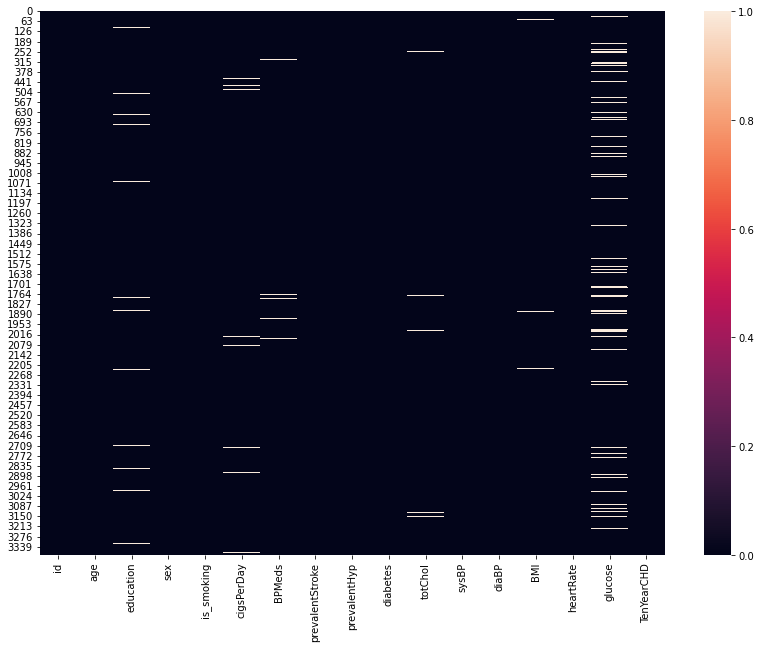

In [10]:
# Plotting the heatmap for missing values 
missing_values = Cardio_df.isnull()  #store the null values from dataset
plt.figure(figsize=(14,10))
sns.heatmap(missing_values)

We will try to see the count and percentage of null values in the particular column with respect to the complete dataset..

In [11]:
# It will show columns that have at least one null value.
missing_val = Cardio_df.columns[Cardio_df.isnull().any()].tolist()

# printing missing value counts for various columns.
print('Missing value Count')
print(Cardio_df[missing_val].isnull().sum().sort_values(ascending = False))  # printing missing values in descending ...
print('___'*12)
print('___'*12)

# printing missing value percentages for various columns.
print('Missing value Percentage')
print(round(Cardio_df[missing_val].isnull().sum().sort_values(ascending = False)/len(Cardio_df)*100,2))  # Dividing by totalrecords lenght and multiplying by 100 to get percentage.

Missing value Count
glucose       304
education      87
BPMeds         44
totChol        38
cigsPerDay     22
BMI            14
heartRate       1
dtype: int64
____________________________________
____________________________________
Missing value Percentage
glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
dtype: float64


glucose and education column have more null values. Usually we replace this null values with the help of other records. But , in this particular case the dataset is related to medical domain,that said, the entries in this dataset are person specific and the values vary among different individuals. Hence the most logical option that we have to deal with such values is removing the rows with any null value.

If we try to impute null values using advanced techniques it may affect the result as those values will be inaccurate and we can't take any risks in this prediction.

# **EDA And Feature Engineering**

Exploratory data analysis or commonly known as EDA helps to explore data, and possibly formulate hypotheses that might cause new data collection and experiments. EDA build a robust understanding of the data, issues associated with either the info or process. It’s a scientific approach to get the story of the data.

All machine learning algorithms use some input data to create outputs. This input data comprise features, which are usually in the form of structured columns. Algorithms require features with some specific characteristics to work properly. Here, the need for feature engineering arises.

Feature engineering mainly have two goals:

   *  Preparing the proper input dataset, compatible with the machine learning   algorithm requirements.

   *  Improving the performance of machine learning models.
   
Lets start by handling the null values that we found out earlier..

In [12]:
# dropping the missing value since we cannot fill it using imputing techniques as 
# this data is related to medical domain (hence varies from person to person).
New_df = Cardio_df.dropna(how = "any")  #Drop any record with null value ..

# Checking if there's still any null values left.
New_df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Now the dataset is free of all the null values..
The patient ID column is of no use for our objective so we will drop the column..

In [13]:
#Dropping the column id and from the dataset..
New_df =New_df.drop(columns =['id'])

In [14]:
New_df.shape   # Checking the shape of new_df after removing null values..

(2927, 16)

In [15]:
New_df.columns  #Have a look at remaining columns..

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **Target Variable -TenYearCHD**

We will try to observe our target variable ...

In [16]:
#Checking the count of how many people have risk ...
New_df.TenYearCHD.value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

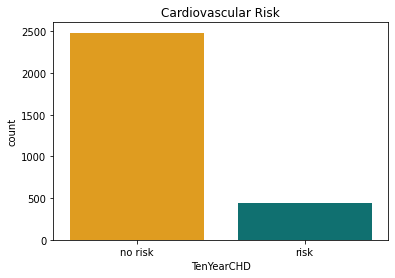

In [17]:
# plotting number of patients at risk of CHD vs those whose results are normal.
my_palette = {0 : 'orange' , 1 : 'teal'}
X = sns.countplot(New_df['TenYearCHD'],palette =my_palette)   #countplot...
X.set_xticklabels(['no risk','risk'])  #settiing xtitle for labels
X.set_title('Cardiovascular Risk') # setting Title
plt.show()

It is clear the percentage/count of people with normal results are pretty high and this creates a problem of class imbalance. It could create problems for model to perform better in such case because the model will be baised towards the normal result predictions..

So we have to convert this data into a balance class, we can achieve so by using different sampling techniques(udersampling or oversampling), during train/test split.

## Age

Text(0.5, 1.0, 'Variation of Age for each target class')

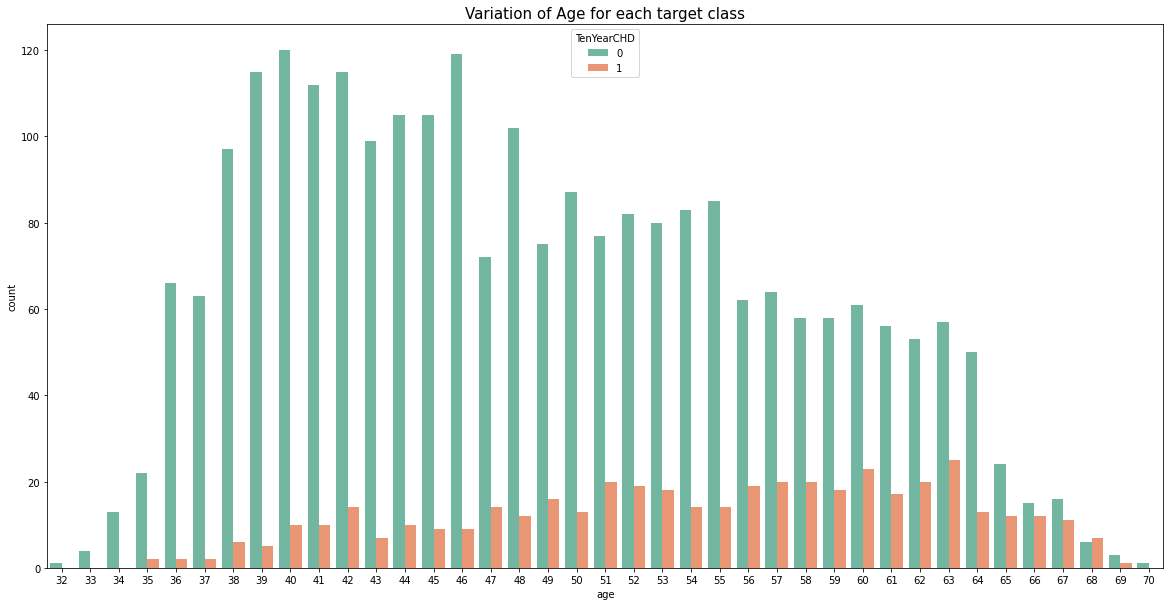

In [18]:
#ploting the countplot for age variable with target class
plt.figure(figsize=(20,10))   #setting the figure size
sns.countplot(data=New_df, x="age", hue="TenYearCHD",palette="Set2")  #Plotting countplot
plt.title('Variation of Age for each target class',fontsize=15)    #setting the title

Here we see that CHD increases from 51 to 67 then decreases.

## Gender

In [19]:
# Counting the number of males and females.
New_df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

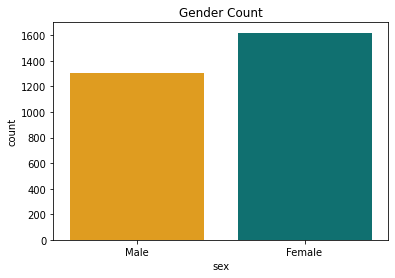

In [20]:
# Plotting the bar graph with number of males and females.
my_palette = {'M' : 'orange' , 'F': 'teal'}
X = sns.countplot(New_df['sex'], palette = my_palette) # plotting countplot
X.set_xticklabels(['Male','Female'])# settiing xtitle for labels
X.set_title('Gender Count') #writing title
plt.show()

Number of Female records are more than Male records in the dataset.

Text(0.5, 1.0, 'Sex Vs Target class')

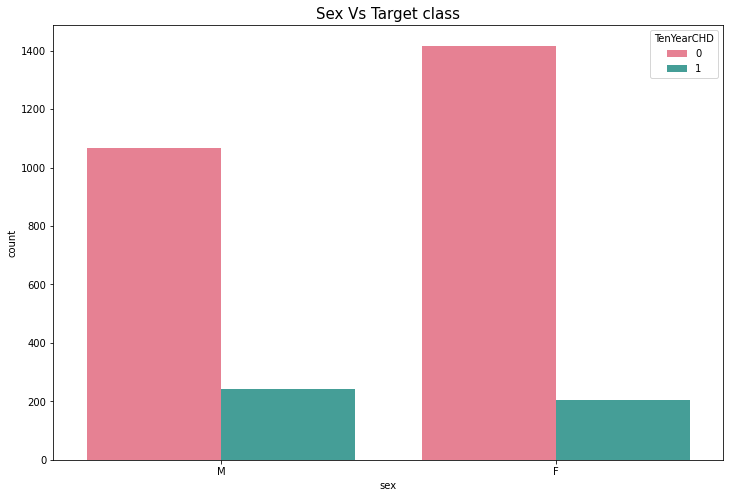

In [21]:
#plt.figure(figsize=(10,5))
fig =plt.figure(figsize=(12,8))

#ploting the countplot for sex variable with target class
sns.countplot(data=New_df,x="sex",hue="TenYearCHD",palette = 'husl')  #PLotting countplot for 'sex'
plt.title("Sex Vs Target class",fontsize=15)  #setting the title


In the above bar chart we can say that no.of CHD female is less than male.

We are converting sex feature into binary form to convert into numerical ...

In [22]:
#converting sex column into binary..
New_df['sex'] = New_df['sex'].map({'M' : 1,'F' : 0}) # Mapping 0 value to Female and 1 to Male

## Daibetes

In [23]:
New_df.diabetes.value_counts() # Value count for diabetes or not

0    2848
1      79
Name: diabetes, dtype: int64

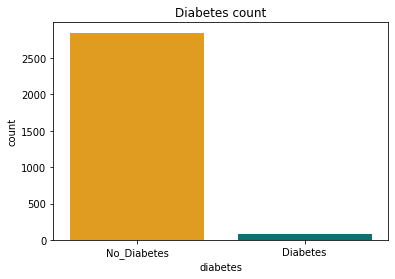

In [24]:
# Plotting countplot for diabetic column
my_palette = {0 : 'orange' , 1 : 'teal'}
X =sns.countplot(New_df['diabetes'],palette = my_palette)   #plotting countplot for diabetes
X.set_xticklabels(['No_Diabetes','Diabetes'])  
X.set_title('Diabetes count')  #setting the title
plt.show()

Only 79 people are diabetic in the data ..There is a large difference in the data ...(bias towards non diabetic )

## Is_smoking and cigsperday

In [25]:
#Value counts before correction
New_df['is_smoking'].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

This column has same number of categories...

We will observe the smoking pattern through different gender ...

Text(0.5, 1.0, 'Distributions of Sex Vs CigsPerDay with Target class')

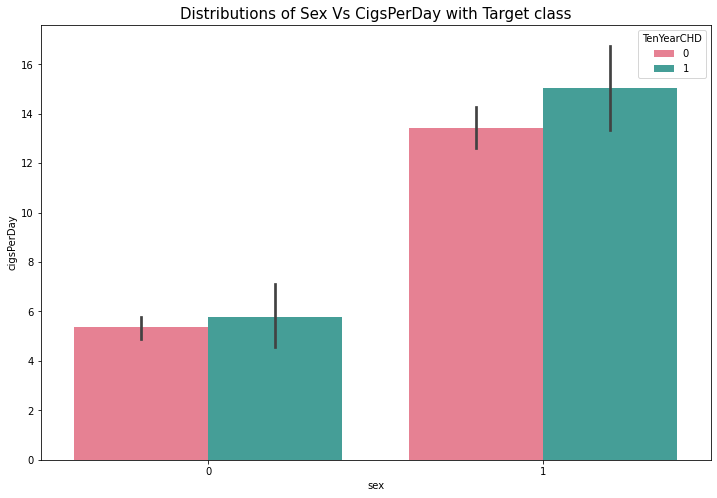

In [26]:
plt.figure(figsize=(12,8))
#smoking_person = cardiovascular_risk.groupby('sex')['cigsPerDay'].sum()

#ploting the barplot between sex variable and cigsPerDay variable with target class
sns.barplot(data=New_df,x="sex", y='cigsPerDay',hue="TenYearCHD",palette ='husl')
plt.title("Distributions of Sex Vs CigsPerDay with Target class",fontsize=15)  #setting the title    # 1 =M and F =0


Its clear that number of males who smokes are significantly higher than the female smokers, even though the entries for female patients were more. This shows smoking is more common in males and its a major cause of CHDs for male patients.

In [27]:
New_df =New_df.drop(columns =['is_smoking'])  #Dropping is_smoking column from the dataset

As we saw 'is_smoking and 'cigsperday' are correlated with each other and cigs perday give more information as how many cigarettes the person is smoking per day ..so we will remove is_smoking.

## BMI (Body-Mass Index)


Text(0.5, 1.0, 'Distributions of BMI Vs Sex with Target class')

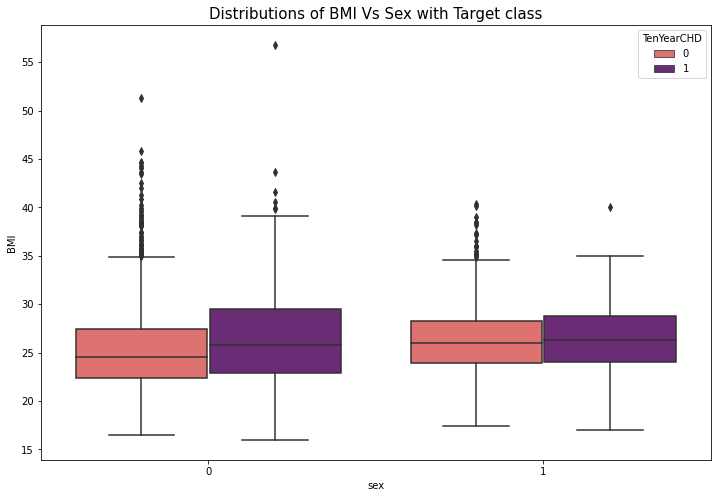

In [28]:
#ploting the boxplot between sex variable and BMI variable with target class
plt.figure(figsize=(12,8))  #setting the figure size
sns.boxplot(data=New_df,x="sex", y='BMI',hue="TenYearCHD",palette = 'magma_r')   #Boxplot for between sex and BMI...
plt.title("Distributions of BMI Vs Sex with Target class",fontsize=15)  #settign the title    1=M  0 =F

In above plot we can say that Female BMI is more than male BMI that's leads to overweight.

so,Female CHD is more than male CHD.

## Cholesterol

Cholesterol is a fatty substance found in the blood. If you have high cholesterol, it can cause your blood vessels to narrow and increase your risk of developing a blood clot

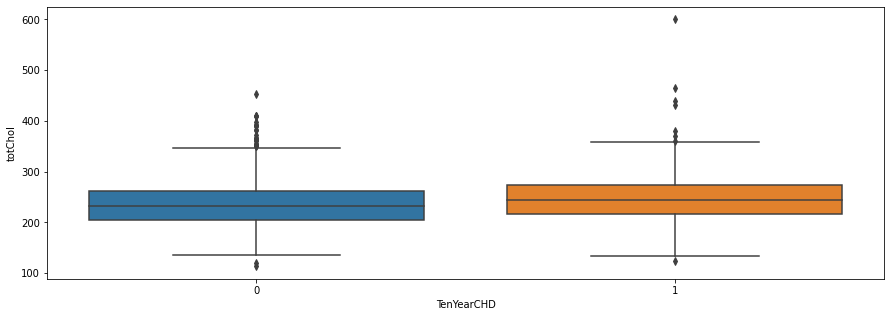

In [29]:
fig= plt.figure(figsize=(15,5))
sns.boxplot(y='totChol',x='TenYearCHD',data= New_df)  #Boxplot for totchol with gender...

Male Have little more cholestrol level than female.

In [30]:
#seperating the numerical and categorical features..
Categorical_features = [i for i in New_df.columns if New_df[i].nunique()<=4]   #Looping through New_df columns and Checkig if unique values are less than or equal to 4

Numeric_features = [i for i in New_df.columns if i not in Categorical_features]  #Looping through New_df columns and string columns in numeric_features which are not in categorical_features.

print("Following are the categorical features in this dataset:")
print(Categorical_features)
print("Following are the numeric features in this dataset:")
print(Numeric_features)

Following are the categorical features in this dataset:
['education', 'sex', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
Following are the numeric features in this dataset:
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


Categorical Features are mostly binary type in our case, hence the values majorly are either 0 and 1 (some exceptions excluded). As for the numeric features, all have a different set of range and continuous values.

We also Converted remaining ['sex'] categorical features into binary so that we can pass them while training the model.

## Observing distribution and removing outliers

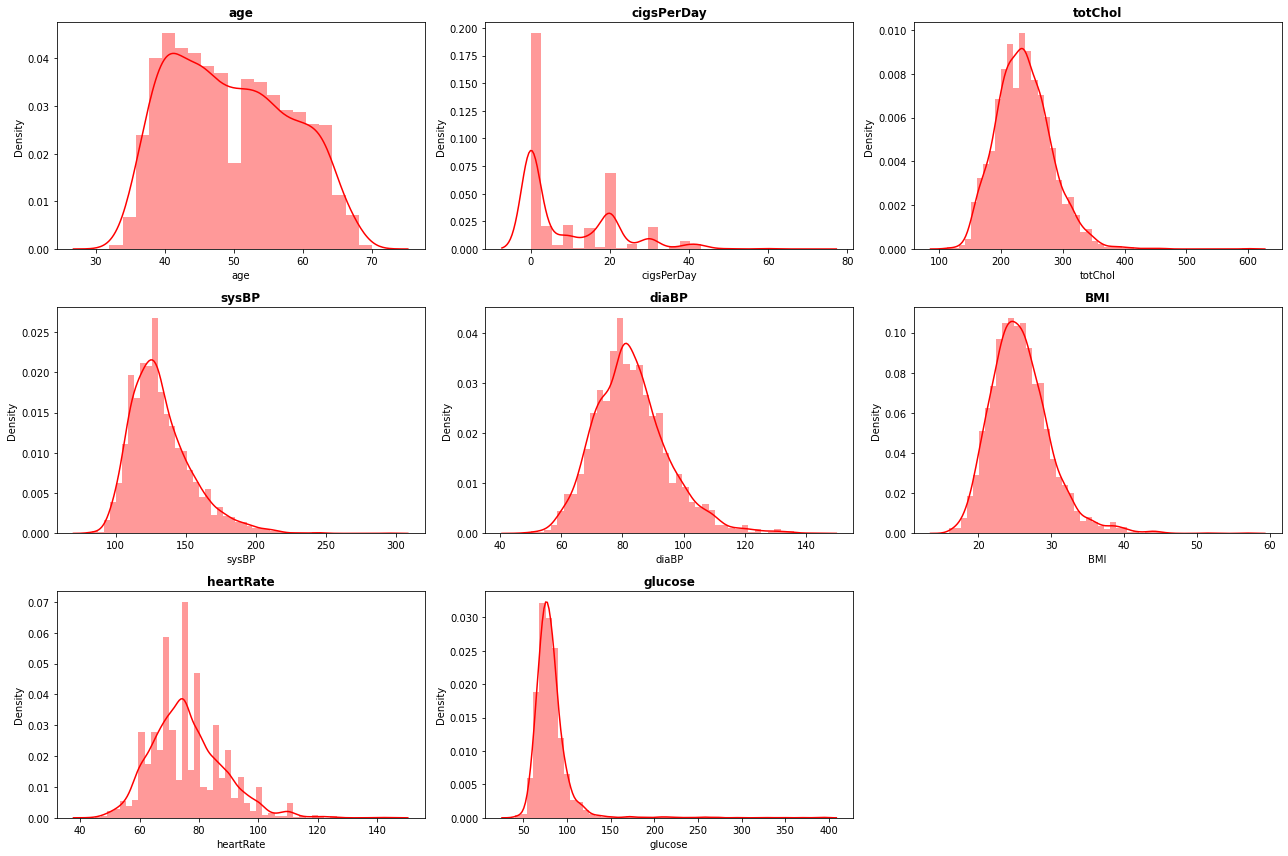

In [31]:
plt.figure(figsize =(18,12))  #setting the size 

for i,column in enumerate(Numeric_features) :  #Plotting distplot for all the numerical features ...
  plt.subplot(3,3,i+1)  #Subplotting the window for graphs
  sns.distplot(New_df[column], color ='red')
  plt.title(f'{column}', weight='bold')  #setting the title as column name.
  plt.tight_layout()

We can observe that most of the distributions are **right skewed** for numeric features. **totChol (total cholesterol) and BMI** have roughly similar distributions.**Glucose**have a highly right skewed distribution. It shows Glucose has a lot of outliers. Though it is usually a good practice to deal with such outliers, however in this case we can't do much about it as the data is taken through medical survey and the values are patient's health stats, hence those values are absolute and we should not manipulate them. We could have used techniques like Square root transformation, Log tranformation,etc., to convert them to near normal distribution, but since we can't manipulate a medical statistics of a person, it is suggestive to go with the actual values.

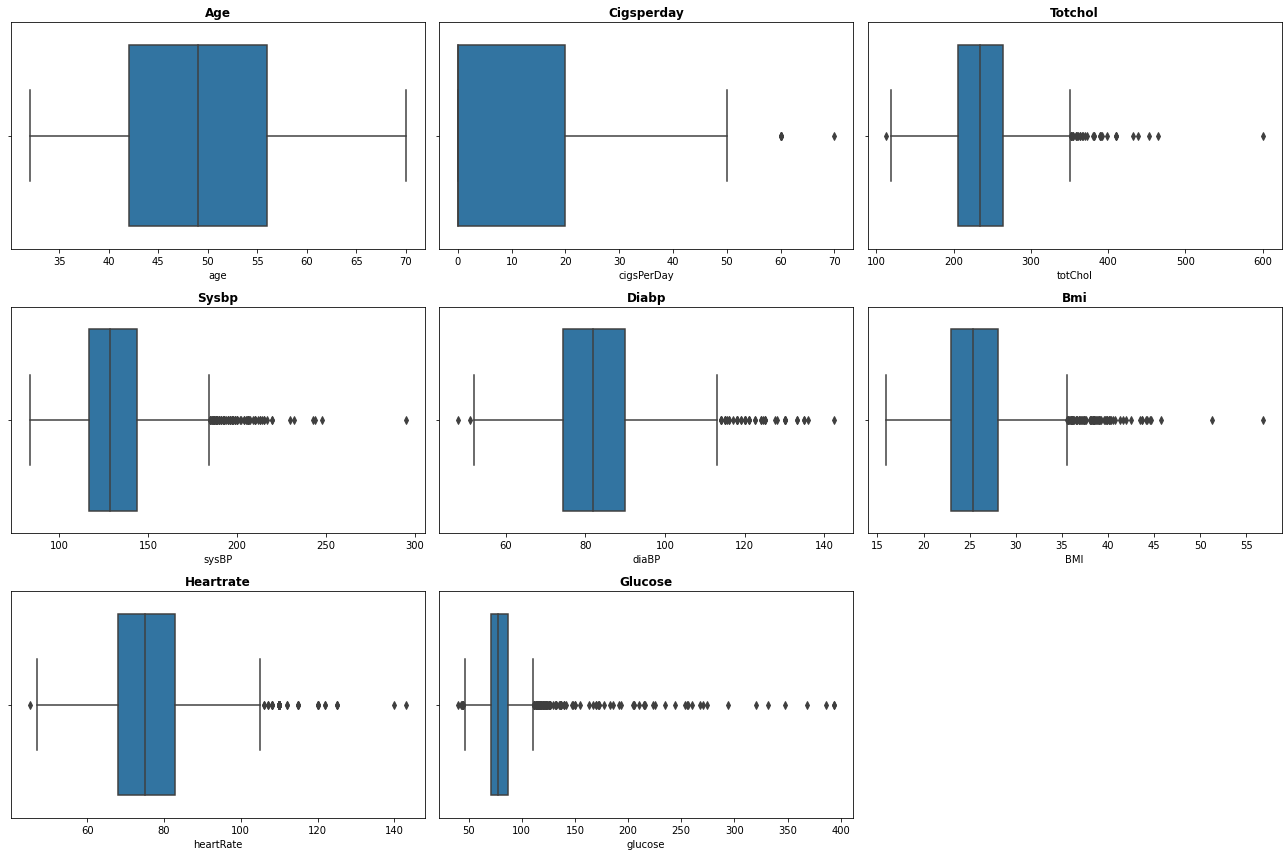

In [32]:
# Box plot distributions for numeric features.
# Define a figure.
plt.figure(figsize=(18,12))

# plotting subplots for every numeric feature.
for i,column in enumerate(Numeric_features):  # Looping through Numeric_features
  plt.subplot(3, 3, i+1)
  sns.boxplot(New_df[column])   #Plotting BoxPlot for every numeric column
  plt.title(f'{column.title()}', weight='bold')  #setting title
  plt.tight_layout()

In [33]:
New_df.shape  #Observing the shape of the dataset 

(2927, 15)

As we can see a lot of outliers in **totchol, sysbp, diabp, BMI , Glucose**. As we discussed we cant manipulate the data.If we drop the rows with this outliers we will lose a huge amount og important data so we cant drop them..We can only try to remove borderline outliers(with minimal data loss) which are unlikely to occure (doesnt make sense). 

In [34]:
New_df =New_df [New_df["cigsPerDay"] <= 50]  # Dropping rows with Cigarette per day greater than 50.

In [35]:
New_df= New_df[New_df['diaBP'] <= 140]  # Dropping rows with DiaBp greater than 140

In [36]:
New_df = New_df[New_df['sysBP'] <= 250]   # Dropping rows with SysBP greater than 250.

In [37]:
New_df = New_df[New_df["heartRate"] <= 130]   # Dropping rows with heart rate greater than 130.

In [38]:
New_df = New_df[New_df["glucose"] <= 300]    # Dropping rows with glucose greater than 300.

In [39]:
New_df = New_df[New_df["totChol"] <= 450]   # Dropping rows with total cholesterol greater than 500.

In [40]:
New_df = New_df[New_df["BMI"] <= 45]     #dropping the rows with BMI greater than 45

In [41]:
New_df.shape  #observing the dataset after removing the borderline outliers ..

(2903, 15)

## Univariate Analysis :

The purpose of univariate analysis is to understand the distribution of values for a single variable.

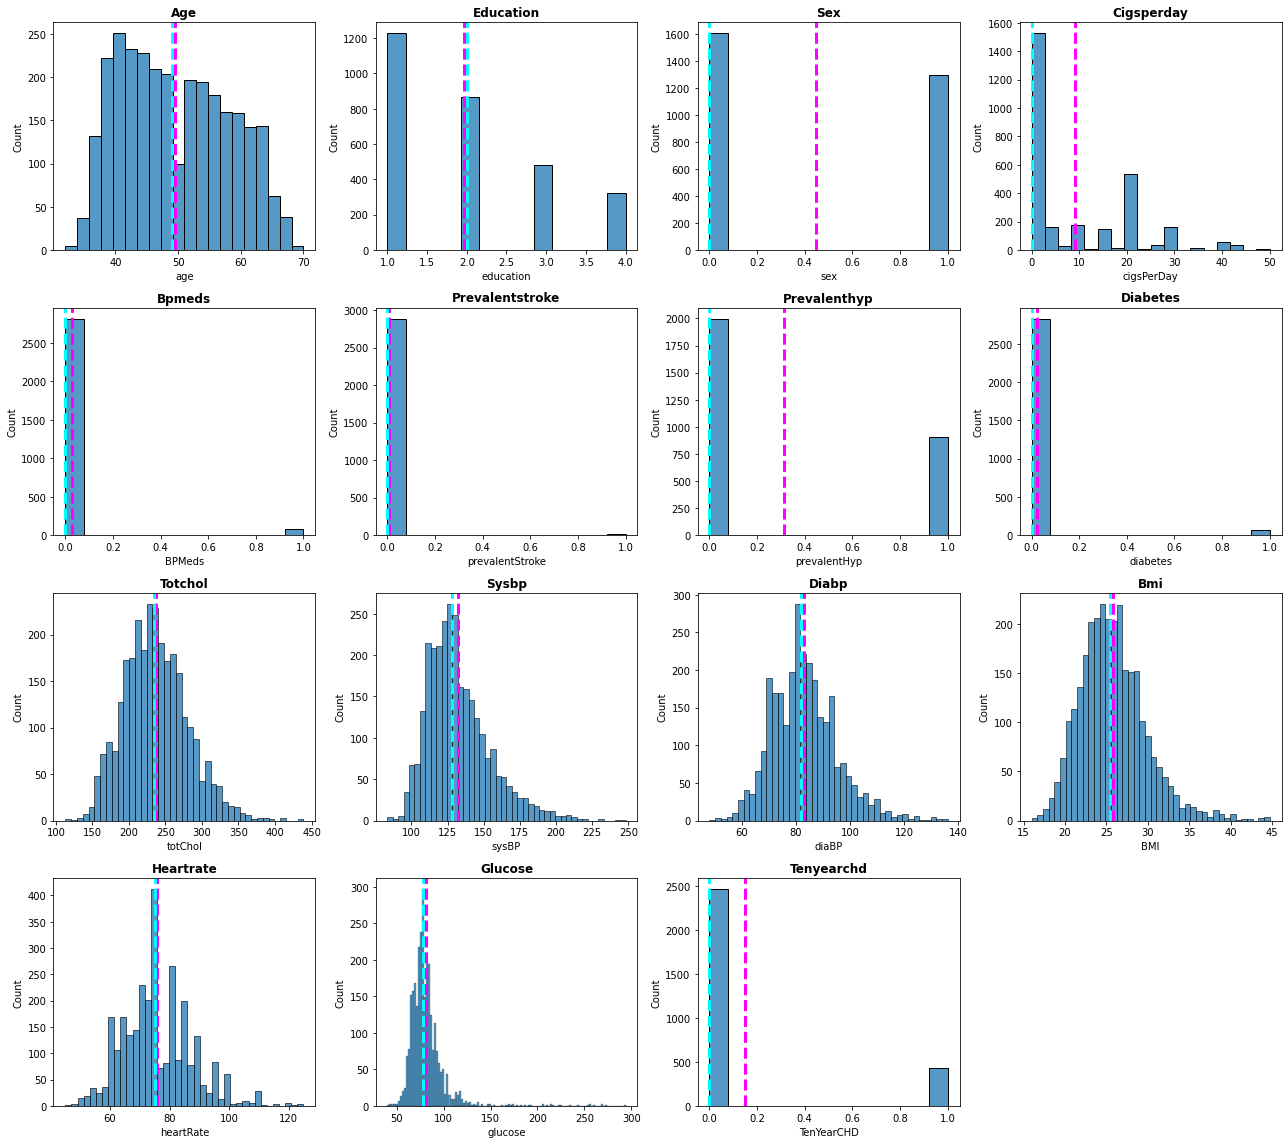

In [42]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(New_df.columns):
  feature = New_df[column]   #saving all columns in feature variable
  ax=plt.subplot(4, 4, i+1)
  sns.histplot(feature)  #plotting histograms for features 
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=3)  #drawing an axis through mean
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=3)  #drawing an axis through median
  plt.title(f'{column.title()}',weight='bold')   #  Setting the title as column name . 
  plt.tight_layout()

From above histograms we can see how mean and median are positioned in distributions.

## Bivariate Analysis :
Bivariate analysis is stated to be an analysis of any concurrent relation between two variables or attributes. 

In our case we'll look for relationships of target variable with all the independent variables.

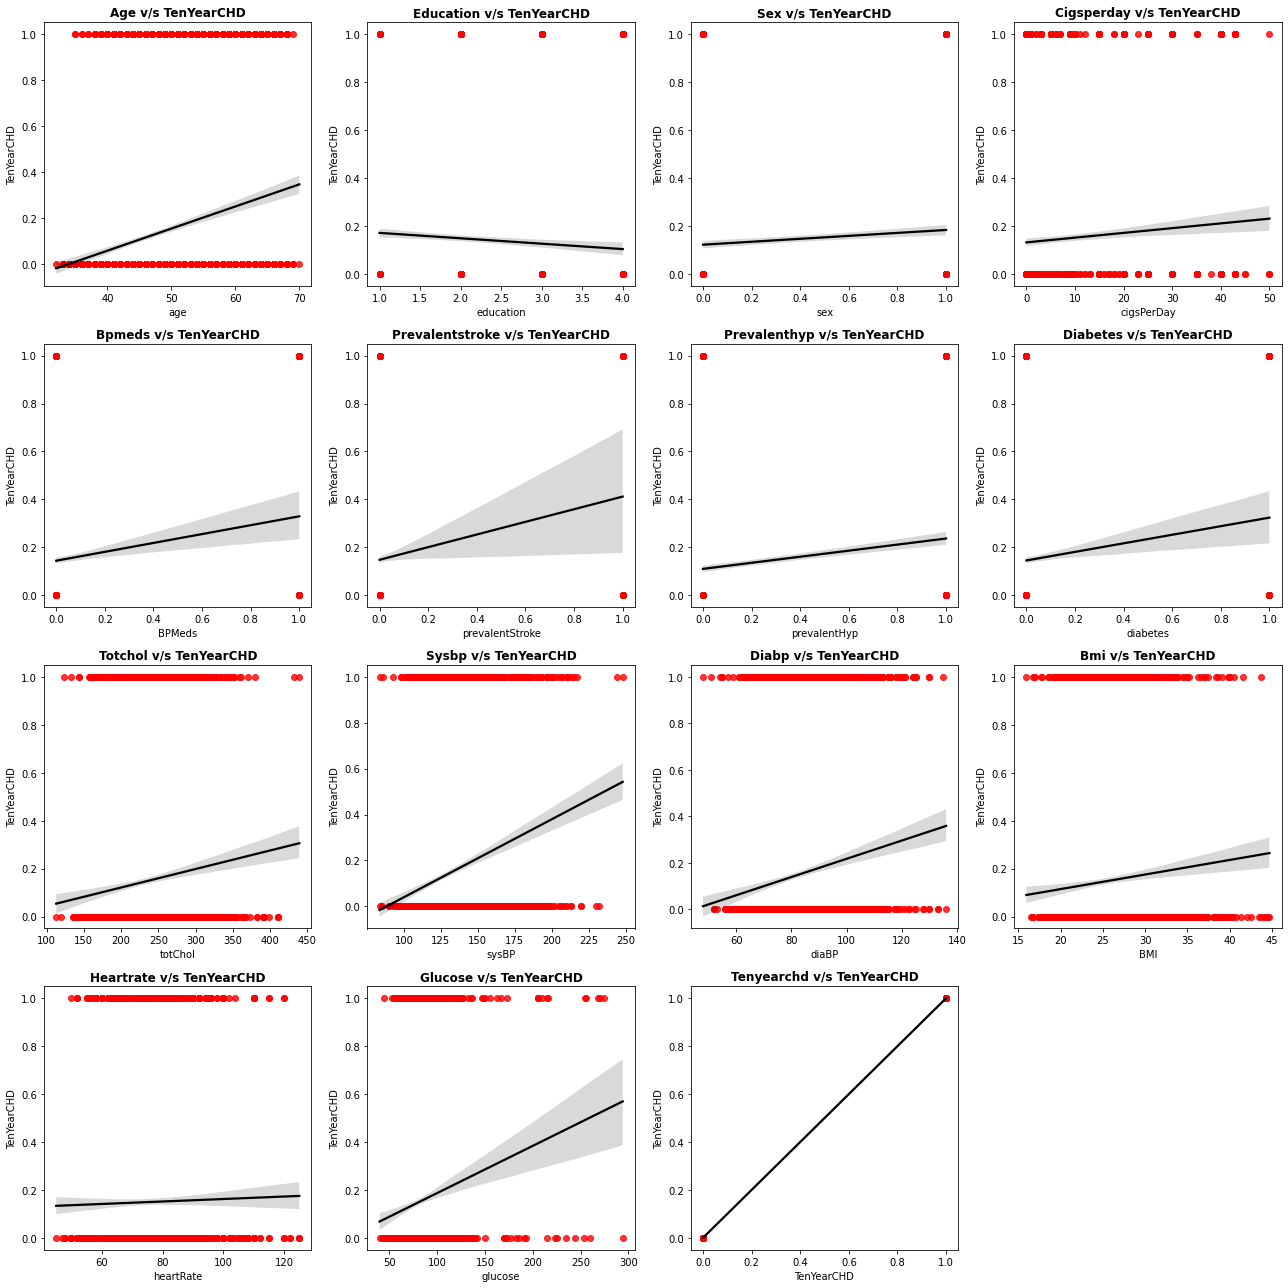

In [43]:
# Checking Linearity using Bivariate analysis.
# defining figure.
plt.figure(figsize=(18,18))

# making subplots for all independent variables vs TenYearCHD(dependent variable).
for n, column in enumerate(New_df.columns ):
  plt.subplot(4, 4, n+1)              #Plotting Subplots
  sns.regplot(x = New_df[column], y =New_df['TenYearCHD'],scatter_kws={"color": 'red'},line_kws={"color": "black"})  #plotting regression plot against our target variable
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold') # Setting title as column name 
  plt.tight_layout()

As we can see a lot of of Independent variables show relation with our Target variable..

## Checking Multicollinearity :

We'll use a correlation map for understanding correlation between each feature.

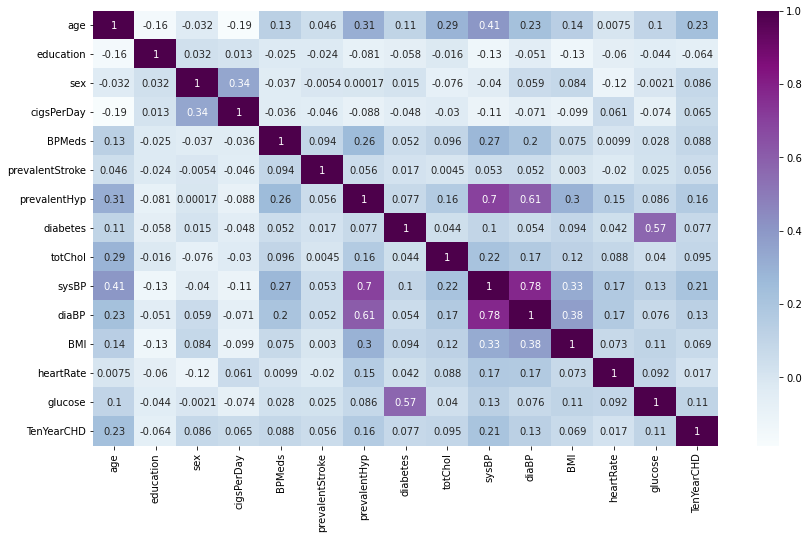

In [44]:
corr_map = New_df.corr()   # Defining a Seaborn correlation map(Heatmap).
f, ax = plt.subplots(figsize=(14, 8))   # display the heatmap.
sns.heatmap(corr_map,cmap='BuPu', annot=True, ax = ax)

## DiaBp and SysBP :

From the above Heatmap, We can see both of these columns are heavily correleted, there's some relationship we can establish with these two features further.

Also Elevation of systolic blood pressure predicts the risk of cardiovascular disease better than increases in diastolic blood pressure. Although associated with more variability in measurement, systolic blood pressure is easier to determine and allows more appropriate risk stratification than diastolic blood pressure.

We can combine these two features using the following formula:

Mean_Arterial_pressure = (Systolic Blood Pressure + 2 x Diastolic Blood Pressure) / 3  .

In [45]:
# Calculating Mean Arterial Pressure using 'SysBP' and 'DiaBP'.
New_df['Mean_Arterial_Pressure'] = (New_df['sysBP'] + 2 * New_df['diaBP'])/3  #mathematical relation

In [46]:
New_df.drop(columns = ['sysBP', 'diaBP'], inplace = True)   # Dropping the SysBP and DiaBp attributes, since they're both included in Mean_Arterial_Pressure.

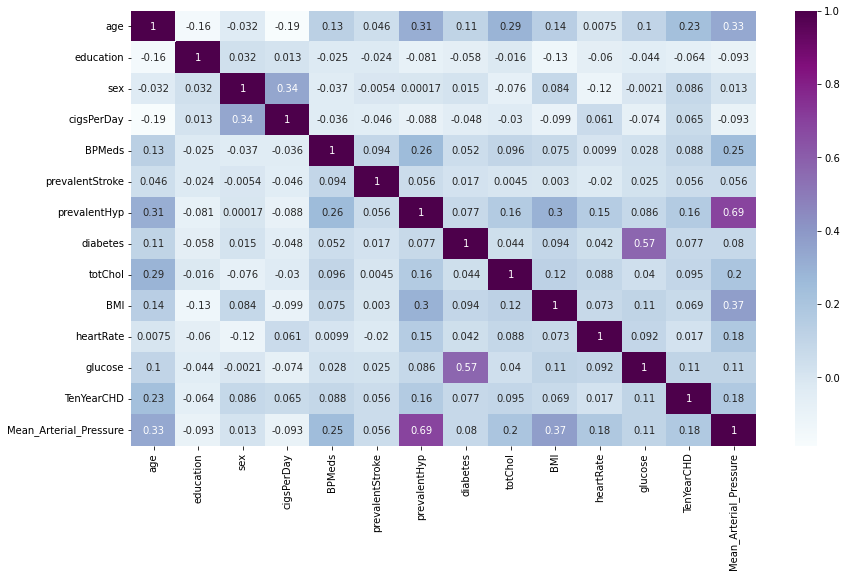

In [47]:
# Again checking correlation ..
corr_map = New_df.corr()   # Defining a Seaborn correlation map(Heatmap).
f, ax = plt.subplots(figsize=(14, 8))   # display the heatmap.
sns.heatmap(corr_map,cmap='BuPu', annot=True, ax = ax)

In [48]:
#Final, dataset after feature engineering...
New_df

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,Mean_Arterial_Pressure
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,121.333333
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,86.000000
3,50,1.0,1,20.0,0.0,0,1,0,233.0,28.26,68.0,94.0,1,111.333333
4,64,1.0,0,30.0,0.0,0,0,0,241.0,26.42,70.0,77.0,0,102.166667
5,61,3.0,0,0.0,0.0,0,1,0,272.0,32.80,85.0,65.0,1,141.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0.0,0.0,0,1,0,217.0,26.98,105.0,113.0,0,118.000000
3385,60,1.0,0,0.0,0.0,0,0,0,261.0,29.28,70.0,103.0,0,93.833333
3386,46,1.0,0,0.0,0.0,0,0,0,199.0,21.96,80.0,84.0,0,71.333333
3387,44,3.0,1,3.0,0.0,0,1,0,352.0,28.92,73.0,72.0,1,134.000000


# **Model Building :**

Now that the Dataset is cleaned and we have added all the neccessary features along with some conversions of categorical features. Its time to split the data into training and testing sets and observe how the models are performing..

Note:- These training and testing data are going to be same for all the model we'll build such that all of the models are evaluated on a same set of parameters.


## Handling Imbalanced data

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use Synthetic Minority Oversampling Technique (SMOTE) technique.

This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced

In [49]:
#independent variables
x = New_df.drop(columns=['TenYearCHD'])  #x is a dataframe with independent features

#dependent variable 
y = New_df['TenYearCHD']   # Y is our new dataframe with only our target variable..

In [50]:
smote = SMOTE()         #object creation

# fit predictor and target variable
x_new, y_new = smote.fit_resample(x,y)   #Using SMOTE to oversample our data and storing in x_new and y_new

print('Original dataset shape', len(New_df))  
print('Resampled dataset shape', len(y_new)) # and we can see our samples have increased

Original dataset shape 2903
Resampled dataset shape 4938


## Train_test_split

In [51]:
#spliting data into train and test dataset
X_train, X_test, Y_train, Y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=0)  #Appying the train test split with 80 -20 % for train and test.. 

In [52]:
#shape of train and test dataframe  
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(3950, 13) (988, 13)
(3950,) (988,)


In [ ]:
#Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler  #importing the standardscalar
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)  #applying it on our dataset..
X_test=scaler.transform(X_test)

## Evaluation

In [ ]:
#evaluation function
def evaluation(Y,y,y_proba):    #creating evaluation function to get all the evaluation parameters in a single time..

  # print(f'Accuracy:\n{accuracy_score(Y, y)}')
  # print()
  # print(f'Confusion Matrix:\n{confusion_matrix(Y, y)}')
  print()
  print(f'Classification Report:\n{classification_report(Y, y)}')  #classification report for the model
  
  precision = precision_score(Y, y)   #Calculating precision
  recall = recall_score(Y, y)  #calculating recall
  f1Score = f1_score(Y,y)  # calculating f1score
  accuracy = accuracy_score(Y, y)  #calculating accuracy
  ROC_AUC_Score = roc_auc_score(Y,y_proba)  #calculating ROC_AUC_score..

  return precision,recall,f1Score,accuracy,ROC_AUC_Score   #returning the parameters

## Models

In [ ]:
#defining algorithm function
def algorithm(model_name):                             #creating the model function which will take model name as the input
  model_obj = model_name
  model_obj.fit(X_train,Y_train)   # will fit on X_train and Y_train

  y_train_pred = model_obj.predict(X_train)  # predicting y_train_pred and y_test_pred
  y_test_pred  = model_obj.predict(X_test)

  y_train_prob = model_obj.predict_proba(X_train)    #predicting the probabilities of each class ...
  y_test_prob = model_obj.predict_proba(X_test)


  return y_train_pred,y_test_pred, y_train_prob, y_test_prob,model_obj

## Confusion Matrix

In [ ]:
#defining confusion matrix function to get it for every model
def confusion_matrix(model_obj,x,y,cmap='OrRd'):         #input
  plot_confusion_matrix(model_obj, x, y,display_labels=['Non CVD','CVD'],cmap=cmap) #the confusion matrix 
  plt.grid(False)        

## Store_Data

In [ ]:
#creating empty dictionary
dict_1,dict_2 = {},{}

In [ ]:
#defining storing_eval_data function
def storing_eval_data(model_name,eval_score,flag=None):

  if flag == 0:                                                 #storing training evaluation score when flag=0
    dict_1 = {'Model': model_name,
            'Precision' :round((eval_score[0]),4),   #storing all the evaluation scores in dict_1
            'Recall':round((eval_score[1]),4),
            'F1-Score':round((eval_score[2]),4),
            'Accuracy':round((eval_score[3]),4),
            'ROC_AUC':round((eval_score[4]),4)
            }
    return dict_1                                              #returning dictionary of training evaluation score

  else:                                                        #storing testing evaluation score when flag = None
    dict_2 = {'Model': model_name,
            'Precision' :round((eval_score[0]),4),  #round limits the decimals to 4
            'Recall':round((eval_score[1]),4),
            'F1-Score':round((eval_score[2]),4),
            'Accuracy':round((eval_score[3]),4),
            'ROC_AUC':round((eval_score[4]),4)
            }
    return dict_2                                       

## **Models we will try to build :**
Logistic Regression Classifier

Decision Tree Classifier

Random Forest Classifier

XGB Classifier

K-Nearest Neighbors(KNN Classifier)

Support Vector Machine(SVM Classifier).

## **Logistic Regression :**

Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).

In [ ]:
# Applying the LogisticRegression
y_train_pred, y_test_pred,  y_train_prob,  y_test_prob, model_obj = algorithm(LogisticRegression(fit_intercept=True,max_iter=10000)) 

**Training set**

In [ ]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])  #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train)

In [ ]:
#calling storing_eval_data function
dict_1 = storing_eval_data('Logistic regression',eval_score,0) #storing the eval score for logistic regression in dict_1.
training_df=pd.DataFrame(dict_1,index=[1])                     # and saving it in training_df dataframe.   

In [ ]:
#evaluation score
for param,value in dict_1.items(): # looping through dict1 and printing the output without model mame..
  if param != 'Model':
    print(f'{param} : {value}')

**Testing set**

In [ ]:
#evaluation on testing set
eval_score = evaluation(Y_test, y_test_pred, y_test_prob[:,1])   #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test)

In [ ]:
#calling storing_eval_data function
dict_2 = storing_eval_data('Logistic regression',eval_score)   #storing the eval score for logistic regression in dict_2
testing_df=pd.DataFrame(dict_2,index=[1])         # and saving it in testing_df dataframe

In [ ]:
#evaluation score
for param,value in dict_2.items():  #looping through dict_2 itmes ..
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_logistic = model_obj.predict_proba(X_test)[:,1]  #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_logistic)  #Calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')   
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')  #xtitle
plt.ylabel('True positive Rate')  #ytitle
plt.title('logistic regression ROC curve')   #title
plt.show()

## **Decision Tree :**
Decision trees can be used for classification as well as regression problems. The name itself suggests that it uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.

Decision trees are upside down which means the root is at the top and then this root is split into various several nodes. Decision trees are nothing but a bunch of if-else statements in layman terms. It checks if the condition is true and if it is then it goes to the next node attached to that decision.

In [ ]:
# Applying the Decision tree Classifer
y_train_pred, y_test_pred,  y_train_prob,  y_test_prob, model_obj = algorithm(DecisionTreeClassifier(max_depth=5,
                                                                                                   min_samples_split=6,
                                                                                                   min_samples_leaf=8)) 

**Training set**

In [ ]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])  #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train)

In [ ]:
dict_1 = storing_eval_data('DecisionTree Classifier',eval_score,0)  #storing training evaluation score in dataframe
training_df=training_df.append(dict_1,ignore_index=True)             #storing the eval data for decision tree in dict_1

In [ ]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

**Testing set**

In [ ]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])  ##using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='Reds_r')

In [ ]:
#storing testing evaluation score
dict_2 = storing_eval_data('Decision Tree Classifier',eval_score)    #storing eval data using the function in dict_2
testing_df=testing_df.append(dict_2,ignore_index=True)               #and appending it in testing_df

In [ ]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_decision = model_obj.predict_proba(X_test)[:,1]   #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_decision)  # calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')    #setting xlabel
plt.ylabel('True positive Rate')     #setting ylabel
plt.title('Decision tree ROC curve')  #setting title
plt.show()

## **Random Forest Classifier**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [ ]:
# Defining a parameter dictionary for grid search CV. This will be the set of parameters 
# and their values the grid search algorithm will apply and get the 
# best combination of these parameters for optimised and accurate results.

param_grid_cv = {
 'n_estimators': [200, 300, 400],
 'max_depth':  [12, 14, 16, 18],
}
 
param_grid_cv

In [ ]:
#Applying the RandomForestClassifier
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(RandomForestClassifier(n_estimators=150,max_depth=6))

**Training set**

In [ ]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])  #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='gist_earth_r')

In [ ]:
#storing the training evaluation score
dict_1 = storing_eval_data('RandomForest Classifier',eval_score,0)  #using storing data eval function to store the data in dict_2
training_df=training_df.append(dict_1,ignore_index=True)            #appending it in training_df

In [ ]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

**Testing set**

In [ ]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1]) #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='gist_earth_r')

In [ ]:
#storing the testing evaluation score
dict_2 = storing_eval_data('RandomForest Classifier',eval_score)  #using storing data eval function to store the data
testing_df=testing_df.append(dict_2,ignore_index=True)              #appending it in testing_df

In [ ]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_rf = model_obj.predict_proba(X_test)[:,1]   #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_rf)  # calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')    #setting xlabel
plt.ylabel('True positive Rate')     #setting ylabel
plt.title('Random forest ROC curve')  #setting title
plt.show()

## **XGB CLassifier**

The beauty of this powerful algorithm lies in its scalability, which drives fast learning through parallel and distributed computing and offers efficient memory usage.

XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

The models that form the ensemble, also known as base learners, could be either from the same learning algorithm or different learning algorithms.**Bagging** and **Boosting** are two widely used ensemble learners. Though these two techniques can be used with several statistical models, the most predominant usage has been with decision trees.

In [ ]:
#Applying the XGB Classifier
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(XGBClassifier())

**Training set**

In [ ]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1]) #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train, cmap='gist_earth_r')

In [ ]:
#storing the training evaluation score
dict_1 = storing_eval_data('XGB Classifier',eval_score,0)  #using storing data eval function to store the data
training_df=training_df.append(dict_1,ignore_index=True)    #appending it in training_df

In [ ]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

**Testing set**

In [ ]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1]) #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='GnBu')

In [ ]:
#storing the testing evaluation score
dict_2 = storing_eval_data('XGB Classifier',eval_score)   #using storing data eval function to store the data
testing_df=testing_df.append(dict_2,ignore_index=True)     #appending it in testing_df

In [ ]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_xgb = model_obj.predict_proba(X_test)[:,1]   #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_xgb)  # calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')    #setting xlabel
plt.ylabel('True positive Rate')     #setting ylabel
plt.title('XGB classifier ROC curve')  #setting title
plt.show()

## **K-Nearest Neighbour (KNN)**

KNN which stands for K-Nearest Neighbours is a simple algorithm that is used for classification and regression problems in Machine Learning. KNN is also non-parametric which means the algorithm does not rely on strong assumptions instead tries to learn any functional form from the training data.

Unlike most of the algorithms with complex names, which are often confusing as to what they really mean, KNN is pretty straight forward. The algorithm considers the k nearest neighbours to predict the class or value of a data point.

The K Nearest Neighbour Algorithm can be performed in 4 simple steps.

Step 1: Identify the problem as either falling to classification or regression.

Step 2: Fix a value for k which can be any number greater than zero.

Step 3: Now find k data points that are closest to the unknown/uncategorized datapoint based on distance(Euclidean Distance, Manhattan Distance etc.)

Step 4: Find the solution in either of the following steps:

In case of classification, we assign the uncategorized datapoint to the class where the maximum number of neighbours belonged to.

In [ ]:
#Applying the KNeighborsClassifier
y_train_pred,y_test_pred, y_train_prob, y_test_prob,model_obj = algorithm(KNeighborsClassifier())

In [ ]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1]) #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='bone')

In [ ]:
#storing the training evaluation score
dict_1 = storing_eval_data('KNeighbors Classifier',eval_score,0)  #using storing data eval function to store the data
training_df=training_df.append(dict_1,ignore_index=True)           #appending it in training_df

In [ ]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
#evaluation on testing test
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1])  #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='bone')

In [ ]:
#storing the testing evaluation score
dict_2 = storing_eval_data('KNeighbors Classifier',eval_score)  #using storing data eval function to store the data
testing_df=testing_df.append(dict_2,ignore_index=True)           #appending it in testing_df

In [ ]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_knn = model_obj.predict_proba(X_test)[:,1]   #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_knn)  # calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')    #setting xlabel
plt.ylabel('True positive Rate')     #setting ylabel
plt.title('KNN ROC curve')  #setting title
plt.show()

## **KNN with gridsearch CV**

We tried to check how much recall can we get with gridsearch CV ...

In [ ]:
params = {
    'n_neighbors' : range(3,10,1),   #Parameters we want to check our model
    'weights' : ['uniform', 'distance']
    }

In [ ]:
knn_model = KNeighborsClassifier() #we cant use defined function for gridsearch cv so we will build new model.
grid_model = GridSearchCV(knn_model,param_grid=params,scoring='recall',cv=5)   #using gridsearch CV
grid_model.fit(X_train,Y_train)  #fitting our model..

In [ ]:
grid_model.best_params_  #Model best Parameters

In [ ]:
knn_model = grid_model.best_estimator_     #storing best Parameters

In [ ]:
knn_y_predict = knn_model.predict(X_test)  #predicting on X_Test
 
print('ROCAUC score:', roc_auc_score(Y_test, knn_y_predict))  #observing our roc_auc , recall values..
print('Recall score:',recall_score(Y_test, knn_y_predict))
print('\n', classification_report(Y_test, knn_y_predict))  #Classification report


It gave us the best recall of 0.93...

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_knn = model_obj.predict_proba(X_test)[:,1]   #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_knn)  # calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')    #setting xlabel
plt.ylabel('True positive Rate')     #setting ylabel
plt.title('KNN-Gridsearch CV ROC curve')  #setting title
plt.show()

# **Support Vector Machines**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [ ]:
#Applying the SVM
from sklearn.svm import SVC
y_train_pred, y_test_pred, y_train_prob, y_test_prob, model_obj = algorithm(SVC(probability=True))

In [ ]:
#evaluation on training set
eval_score = evaluation(Y_train,y_train_pred,y_train_prob[:,1])  #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on training set
confusion_matrix(model_obj,X_train,Y_train,cmap='rocket')

In [ ]:
#storing training evaluation score
dict_1 = storing_eval_data('SVM Classifier',eval_score,0)   #using storing data eval function to store the data
training_df=training_df.append(dict_1,ignore_index=True)      #appending it in training_df

In [ ]:
#evaluation score
for param,value in dict_1.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
#evaluation on testing set
eval_score = evaluation(Y_test,y_test_pred,y_test_prob[:,1]) #using the defined evaluation function to get the classification report

In [ ]:
#Visualising the confusion matrix to evaluate the performance of the model on testing set
confusion_matrix(model_obj,X_test,Y_test,cmap='rocket')

In [ ]:
#storing testing evaluation score
dict_2 = storing_eval_data('SVM Classifier',eval_score)     #using storing data eval function to store the data
testing_df=testing_df.append(dict_2,ignore_index=True)        #appending it in testing_df

In [ ]:
#evaluation score
for param,value in dict_2.items():
  if param != 'Model':
    print(f'{param} : {value}')

In [ ]:
# Getting the prediction probabilities for test set 
y_pred_proba_svm = model_obj.predict_proba(X_test)[:,1]   #calculating probabilities for X_test

# Getting parameters for ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba_svm)  # calculating roc_curve

# Plotting the ROC curve
plt.plot([0,1],[0,1],linestyle ='--')
plt.plot(fpr,tpr, marker ='.')
plt.xlabel('False positive rate')    #setting xlabel
plt.ylabel('True positive Rate')     #setting ylabel
plt.title('SVM ROC curve')  #setting title
plt.show()

In [ ]:
training_df

In [ ]:
testing_df

# **Conclusion**

We've noticed that XBG Classifier is the stand out performer among all models with an f1-score of 0.8397. it's safe to say that XGB Classifier provides an optimal solution to our problem.

In case of Logistic regression, We were able to see the maximum f1-score of 0.658.

KNN gave us recall of 86 % and with gridsearch CV it gave a recall of 93%

Out of the tree-based algorithms, the Random Forest Classifier was providing an optimal solution towards achieving our Objective. We were able to achieve an f1-score of 0.7703 We also noticed that in the case of Decision-tree Classifier, we were able to achieve an f1-score of 0.7034 for the test split.

For SVM(Support Vector Machines) Classifier, the f1-score lies around 0.7417.

Finally , As in the medical domain ( False negative values have importance we dont want to mispredict a person safe when he has the risk) recall ha the most importance..KNN, XGB , Random Forest gave the best recall 0.86 ,0.80 ,0.81.
